In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# load iris database
data = pd.read_csv('Iris.csv')
data.sample(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
36,37,5.5,3.5,1.3,0.2,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
31,32,5.4,3.4,1.5,0.4,Iris-setosa
21,22,5.1,3.7,1.5,0.4,Iris-setosa


In [ ]:
from subprocess import check_output
print(check_output(["ls", "Iris.csv"]).decode("utf8"))

Iris.csv



In [ ]:
data.describe()


,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.054362,3.773826,1.206040
std,0.828594,0.435810,1.760543,0.760354
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


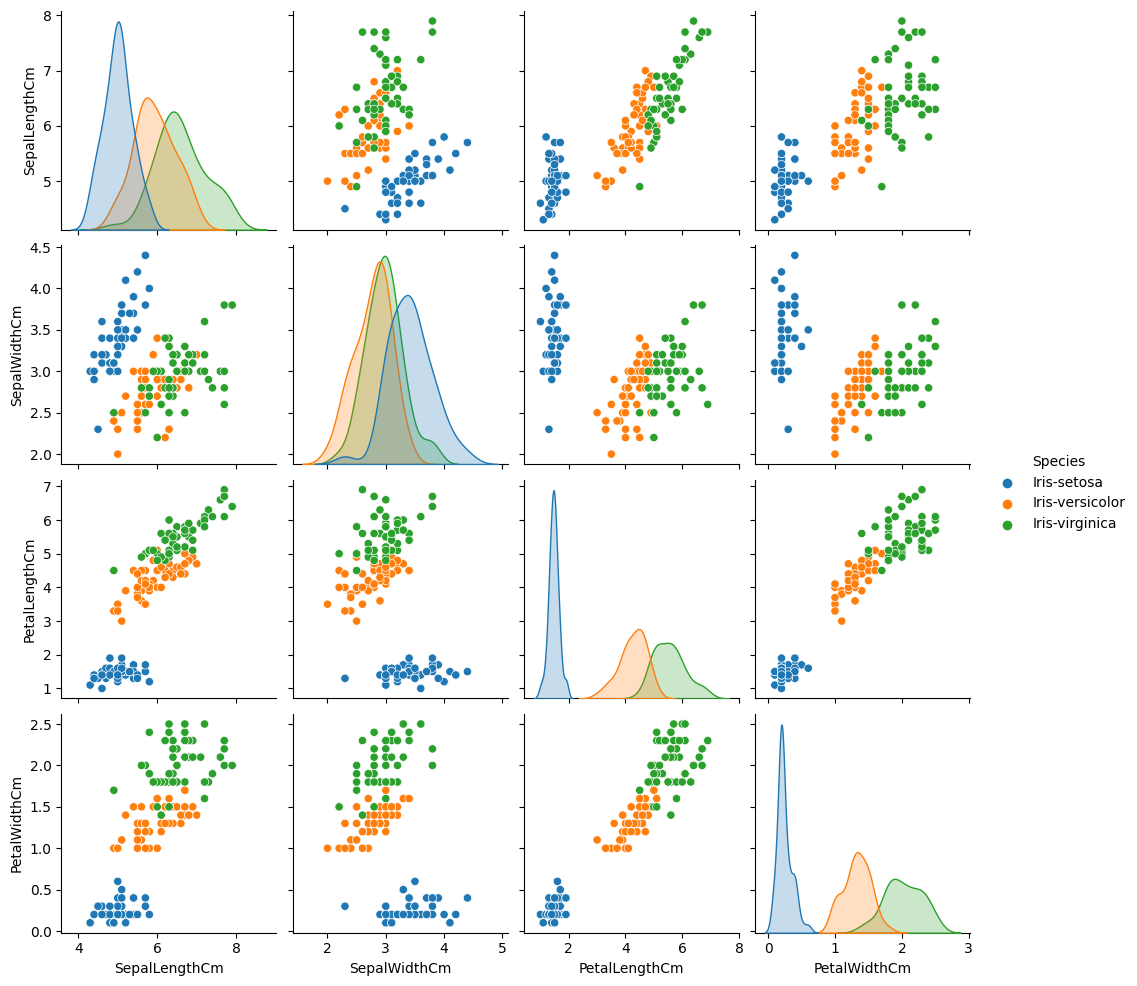

In [ ]:
# simple visualization to show how the inputs compare against each other
sns.pairplot( data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species' )

In [ ]:
df_norm = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
72,0.555556,0.208333,0.661017,0.583333
124,0.666667,0.541667,0.796610,0.833333
21,0.222222,0.708333,0.084746,0.125000
1,0.166667,0.416667,0.067797,0.041667
107,0.833333,0.375000,0.898305,0.708333


In [ ]:
df_norm.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
target.sample(n=5)

,Species
121,2
17,0
70,1
91,1
50,1


In [ ]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
133,0.555556,0.333333,0.694915,0.583333,2
0,0.222222,0.625000,0.067797,0.041667,0
40,0.194444,0.625000,0.050847,0.083333,0
93,0.194444,0.125000,0.389831,0.375000,1
39,0.222222,0.583333,0.084746,0.041667,0


In [ ]:
train_test_per = 90/100.0
df['train'] = np.random.rand(len(df)) < train_test_per
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,train
76,0.694444,0.333333,0.644068,0.541667,1,True
126,0.527778,0.333333,0.644068,0.708333,2,True
67,0.416667,0.291667,0.525424,0.375000,1,True
127,0.500000,0.416667,0.661017,0.708333,2,True
112,0.694444,0.416667,0.762712,0.833333,2,False


In [ ]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
91,0.500000,0.416667,0.610169,0.541667,1
125,0.805556,0.500000,0.847458,0.708333,2
96,0.388889,0.375000,0.542373,0.500000,1
54,0.611111,0.333333,0.610169,0.583333,1
75,0.638889,0.416667,0.576271,0.541667,1


In [ ]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
148,0.527778,0.583333,0.745763,0.916667,2
68,0.527778,0.083333,0.593220,0.583333,1
104,0.611111,0.416667,0.813559,0.875000,2
112,0.694444,0.416667,0.762712,0.833333,2
80,0.333333,0.166667,0.474576,0.416667,1


In [ ]:
X = train.values[:,:4]
X[:5]

array([[0.52777778, 0.33333333, 0.6440678 , 0.70833333],
       [0.19444444, 0.41666667, 0.10169492, 0.04166667],
       [0.41666667, 0.33333333, 0.69491525, 0.95833333],
       [0.30555556, 0.41666667, 0.59322034, 0.58333333],
       [0.61111111, 0.41666667, 0.71186441, 0.79166667]])

In [ ]:
targets = [[1,0,0],[0,1,0],[0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,4:5]])
y[:5]

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765],
       [-0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694],
       [ 0.55876584, -0.60462985,  0.72598647,  0.96680135, -0.67231552],
       [ 0.19466789, -0.9820278 , -0.22685743, -0.91167988,  0.91330594]])

In [ ]:
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.12770671,  0.89795461,  0.57261197],
       [ 0.7325786 , -0.65366916, -0.85010283],
       [ 0.20148544, -0.66405563,  0.46676034],
       [-0.18311228,  0.05581765,  0.87514317],
       [ 0.04339224, -0.78361323, -0.68355319]])

In [ ]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

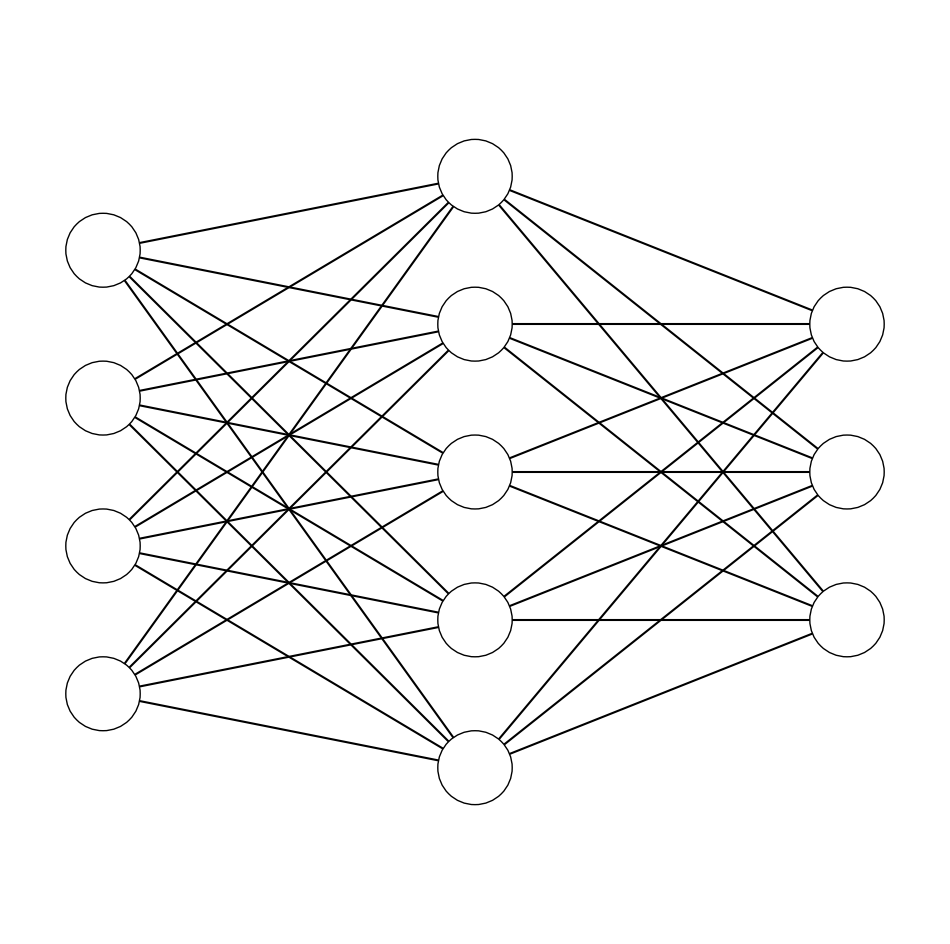

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 5, 3])

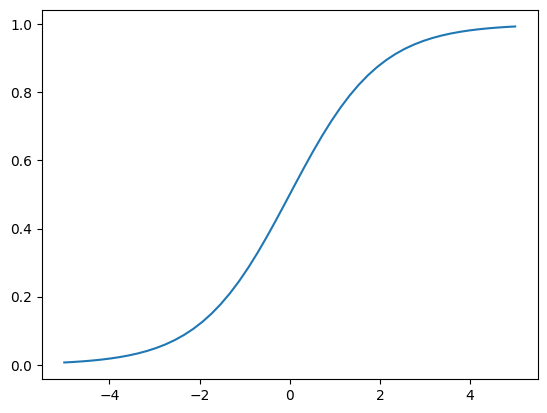

In [ ]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

In [ ]:
learning_rate = 0.2
error = []
for epoch in range(1000):

    l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

    er = (abs(y - l2)).mean()
    error.append(er)

    l2_delta = (y - l2)*(l2 * (1-l2))
    w2 += l1.T.dot(l2_delta) * learning_rate

    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    w1 += X.T.dot(l1_delta) * learning_rate

print('Error:', er)

Error: 0.1100503138013285


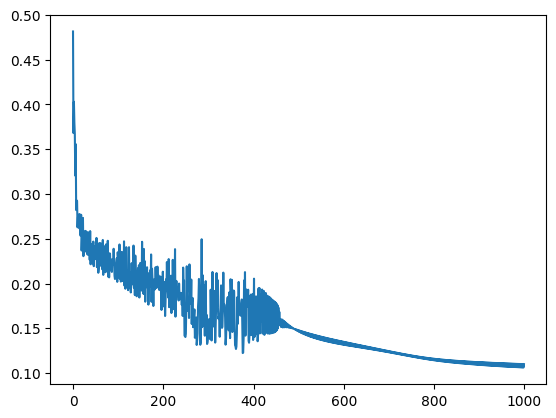

In [ ]:
plt.plot(error)


In [ ]:
X = test.values[:,:4]
y = np.array([targets[int(x)] for x in test.values[:,4:5]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)

array([[0.996, 0.   , 0.016],
       [0.996, 0.   , 0.024],
       [0.996, 0.   , 0.009],
       [0.997, 0.001, 0.004],
       [0.   , 0.805, 0.285],
       [0.001, 0.841, 0.046],
       [0.001, 0.804, 0.05 ],
       [0.   , 0.137, 0.892],
       [0.   , 0.887, 0.062],
       [0.   , 0.595, 0.552],
       [0.046, 1.   , 0.   ],
       [0.   , 0.024, 0.969],
       [0.   , 0.024, 0.969],
       [0.   , 0.029, 0.966],
       [0.   , 0.75 , 0.409],
       [0.   , 0.035, 0.96 ],
       [0.   , 0.029, 0.956]])

In [ ]:
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)

testres = test[['Species']].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

             Species       Prediction
21       Iris-setosa      Iris-setosa
33       Iris-setosa      Iris-setosa
36       Iris-setosa      Iris-setosa
39       Iris-setosa      Iris-setosa
57   Iris-versicolor  Iris-versicolor
58   Iris-versicolor  Iris-versicolor
66   Iris-versicolor  Iris-versicolor
68   Iris-versicolor   Iris-virginica
79   Iris-versicolor  Iris-versicolor
80   Iris-versicolor  Iris-versicolor
95   Iris-versicolor  Iris-versicolor
104   Iris-virginica   Iris-virginica
112   Iris-virginica   Iris-virginica
118   Iris-virginica   Iris-virginica
134   Iris-virginica  Iris-versicolor
146   Iris-virginica   Iris-virginica
148   Iris-virginica   Iris-virginica
Correct: 15 / 17 : 88.23529411764706 %
